# Exercises I

### Run python -m pip install pymysql from your terminal to install pymysql.

### Create a notebook or python script named advanced_dataframes to do your work in for these exercises.

#### 1. Run python -m pip install pymysql from your terminal to install the mysql client (any folder is fine)

#### 2. cd into your exercises folder for this module and run echo env.py >> .gitignore

####  3. Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url connection string formatted like in the example at the start of this lesson.

In [44]:
import pandas as pd
import numpy as np
import env

# get_db_url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'   

# I can check the variable but don't leave it printed!

def get_db_url(user, password, host, database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'
    

#### 4. Use your function to obtain a connection to the employees database.

In [51]:
url = get_db_url(env.user, env.password, env.host, 'employees') #easy way to change DB needed
# url #not leaving it printed out


#### 5. Once you have successfully run a query:

In [52]:
pd.read_sql('select * from employees limit 5', url)

# can format it this way or with line break if desired


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


####  a. Intentionally make a typo in the database url. What kind of error message do you see?

In [ ]:
url = get_db_url(env.user, env.password, env.host, 'employeees')

# LONG error about access being denied

####  b. Intentionally make an error in your SQL query. What does the error message look like?

In [3]:
url = get_db_url(env.user, env.password, env.host, 'employees')


pd.read_sql('select % from employees imit 5', url)

# LONG error about the SQL syntax (shows where kinda)

ProgrammingError: (pymysql.err.ProgrammingError) (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near '5' at line 1")
[SQL: select * from employees imit 5]
(Background on this error at: https://sqlalche.me/e/14/f405)

#### 6. Read the employees and titles tables into two separate DataFrames.

In [57]:
titles = pd.read_sql('select * from titles', url)
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [58]:
employees = pd.read_sql('select * from employees', url)
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


#### 7. How many rows and columns do you have in each DataFrame? Is that what you expected?

In [59]:
titles.shape

(443308, 4)

In [60]:
employees.shape

(300024, 6)

In [ ]:
# I believe so, there are more titles because employees have switched titles while 
# working many years.

#### 8. Display the summary statistics for each DataFrame.

In [61]:
titles.describe()

,emp_no
count,443308.000000
mean,253075.034430
std,161853.292613
min,10001.000000
25%,84855.750000
50%,249847.500000
75%,424891.250000
max,499999.000000


In [62]:
employees_table.describe(include='all') # shows us the string values, as well

,emp_no,birth_date,first_name,last_name,gender,hire_date
count,300024.000000,300024,300024,300024,300024,300024
unique,NaN,4750,1275,1637,2,5434
top,NaN,1952-03-08,Shahab,Baba,M,1985-06-20
freq,NaN,95,295,226,179973,132
mean,253321.763392,NaN,NaN,NaN,NaN,NaN
std,161828.235540,NaN,NaN,NaN,NaN,NaN
min,10001.000000,NaN,NaN,NaN,NaN,NaN
25%,85006.750000,NaN,NaN,NaN,NaN,NaN
50%,249987.500000,NaN,NaN,NaN,NaN,NaN
75%,424993.250000,NaN,NaN,NaN,NaN,NaN


In [38]:
employees_table.columns

Index(['emp_no', 'birth_date', 'first_name', 'last_name', 'gender',
       'hire_date'],
      dtype='object')

#### 9. How many unique titles are in the titles DataFrame?

In [63]:
titles

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


In [68]:
titles.title #showing me the title column

0         Senior Engineer
1                   Staff
2         Senior Engineer
3                Engineer
4         Senior Engineer
               ...       
443303           Engineer
443304    Senior Engineer
443305       Senior Staff
443306              Staff
443307           Engineer
Name: title, Length: 443308, dtype: object

In [66]:
len(titles.title.unique())        # could also do it in MySql (some people did)

7

In [67]:
titles.title.nunique()

7

#### 10. What is the oldest date in the to_date column?

In [69]:
titles.to_date

0         9999-01-01
1         9999-01-01
2         9999-01-01
3         1995-12-01
4         9999-01-01
             ...    
443303    1992-08-29
443304    9999-01-01
443305    9999-01-01
443306    1998-12-27
443307    9999-01-01
Name: to_date, Length: 443308, dtype: object

In [70]:
titles.to_date.min()

datetime.date(1985, 3, 1)

#### 11. What is the most recent date in the to_date column?

In [71]:
titles.to_date.max() # this represents the 'Current Date'

datetime.date(9999, 1, 1)

# Exercises II

#### 1. Copy the `users` and `roles` DataFrames from the examples above.

In [72]:
# Create the users DataFrame.

users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users


,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [73]:
# Create the roles DataFrame

roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles


,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


#### 2. What is the result of using a `right` join on the DataFrames?

In [78]:
users.merge(roles, left_on='role_id', right_on='id', how='right', indicator = True)
#book uses users first to merge with roles (no diff)

,id_x,name_x,role_id,id_y,name_y,_merge
0,1.0,bob,1.0,1,admin,both
1,2.0,joe,2.0,2,author,both
2,3.0,sally,3.0,3,reviewer,both
3,4.0,adam,3.0,3,reviewer,both
4,NaN,NaN,NaN,4,commenter,right_only


In [79]:
pd.merge(users, roles, left_on='role_id', right_on='id', how='right', indicator = True)
#I prefer using pd.merge

,id_x,name_x,role_id,id_y,name_y,_merge
0,1.0,bob,1.0,1,admin,both
1,2.0,joe,2.0,2,author,both
2,3.0,sally,3.0,3,reviewer,both
3,4.0,adam,3.0,3,reviewer,both
4,NaN,NaN,NaN,4,commenter,right_only


#### 3. What is the result of using an `outer` join on the DataFrames?

In [80]:
pd.merge(users, roles, left_on='role_id', right_on='id', how='outer', indicator = True)
#all elements from both df are kept

,id_x,name_x,role_id,id_y,name_y,_merge
0,1.0,bob,1.0,1.0,admin,both
1,2.0,joe,2.0,2.0,author,both
2,3.0,sally,3.0,3.0,reviewer,both
3,4.0,adam,3.0,3.0,reviewer,both
4,5.0,jane,NaN,NaN,NaN,left_only
5,6.0,mike,NaN,NaN,NaN,left_only
6,NaN,NaN,NaN,4.0,commenter,right_only


#### 4. What happens if you drop the foreign keys from the DataFrames and try to merge them?

In [87]:
pd.merge(users, roles, how='outer', indicator = True) #just concats them (stacks)
#inner yields nothing
#left just shows you users
#right shows roles + role_id column but all all NaN
#outer combines what they both have (id and name) and makes little sense

,id,name,role_id,_merge
0,1,bob,1.0,left_only
1,2,joe,2.0,left_only
2,3,sally,3.0,left_only
3,4,adam,3.0,left_only
4,5,jane,NaN,left_only
5,6,mike,NaN,left_only
6,1,admin,NaN,right_only
7,2,author,NaN,right_only
8,3,reviewer,NaN,right_only
9,4,commenter,NaN,right_only


In [246]:
users_1 = users.drop(columns='role_id')
users_1

,id,name
0,1,bob
1,2,joe
2,3,sally
3,4,adam
4,5,jane
5,6,mike


In [244]:
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [247]:
pd.merge(users_1, roles, how ='outer', indicator = True)

,id,name,_merge
0,1,bob,left_only
1,2,joe,left_only
2,3,sally,left_only
3,4,adam,left_only
4,5,jane,left_only
5,6,mike,left_only
6,1,admin,right_only
7,2,author,right_only
8,3,reviewer,right_only
9,4,commenter,right_only


#### 5. Load the `mpg` dataset from PyDataset.

In [88]:
from pydataset import data

In [91]:
mpg = data('mpg')

#### 6. Output and read the documentation for the `mpg` dataset.

In [93]:
data('mpg', show_doc=True) # view the documentation for the dataset


mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




#### 7. How many rows and columns are in the dataset?

In [100]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [94]:
mpg.shape

(234, 11)

#### 8. Check out your column names and perform any cleanup you may want on them.

In [97]:
mpg.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

In [155]:
mpg.drop(columns= ['displ','trans','drv','fl']) 
#make sure to use brackets when providing a list of columns to drop

,manufacturer,model,year,cyl,cty,hwy,class
1,audi,a4,1999,4,18,29,compact
2,audi,a4,1999,4,21,29,compact
3,audi,a4,2008,4,20,31,compact
4,audi,a4,2008,4,21,30,compact
5,audi,a4,1999,6,16,26,compact
...,...,...,...,...,...,...,...
230,volkswagen,passat,2008,4,19,28,midsize
231,volkswagen,passat,2008,4,21,29,midsize
232,volkswagen,passat,1999,6,16,26,midsize
233,volkswagen,passat,1999,6,18,26,midsize


In [253]:
mpg = mpg.rename(column{'class':'cls'}) # like to change class because it is a reserved word in Python

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2955074995.py, line 1)

#### 9. Display the summary statistics for the dataset.

In [131]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [112]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


### 10. How many different manufacturers are there?

In [255]:
len(mpg.manufacturer.unique())

15

In [119]:
mpg.nunique() #15 different manufacturers

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
dtype: int64

In [121]:
mpg.manufacturer

1            audi
2            audi
3            audi
4            audi
5            audi
          ...    
230    volkswagen
231    volkswagen
232    volkswagen
233    volkswagen
234    volkswagen
Name: manufacturer, Length: 234, dtype: object

In [151]:
mpg.manufacturer.nunique() #also shows 15

15

In [152]:
mpg.groupby('manufacturer').describe().round(2).T #interesting... but just tinkering

manufacturer     audi  chevrolet    dodge     ford    honda  hyundai     jeep  \
displ count     18.00      19.00    37.00    25.00     9.00    14.00     8.00   
      mean       2.54       5.06     4.38     4.54     1.71     2.43     4.58   
      std        0.67       1.37     0.87     0.54     0.15     0.36     1.02   
      min        1.80       2.40     2.40     3.80     1.60     2.00     3.00   
      25%        2.00       4.45     3.80     4.00     1.60     2.10     3.92   
      50%        2.80       5.30     4.70     4.60     1.60     2.40     4.70   
      75%        3.02       5.85     4.70     4.60     1.80     2.65     4.95   
      max        4.20       7.00     5.90     5.40     2.00     3.30     6.10   
year  count     18.00      19.00    37.00    25.00     9.00    14.00     8.00   
      mean    2003.50    2004.68  2004.11  2002.60  2003.00  2004.14  2005.75   
      std        4.63       4.46     4.52     4.50     4.74     4.62     4.17   
      min     1999.00    1999.00  1999.00  1999.00  1999.00  1999.00  1999.00   
      25%     1999.00    1999.00  1999.00  1999.00  1999.00  1999.00  2005.75   
      50%     2003.50    2008.00  2008.00  1999.00  1999.00  2008.00  2008.00   
      75%     2008.00    2008.00  2008.00  2008.00  2008.00  2008.00  2008.00   
      max     2008.00    2008.00  2008.00  2008.00  2008.00  2008.00  2008.00   
cyl   count     18.00      19.00    37.00    25.00     9.00    14.00     8.00   
      mean       5.22       7.26     7.08     7.20     4.00     4.86     7.25   
      std        1.22       1.37     1.12     1.00     0.00     1.03     1.04   
      min        4.00       4.00     4.00     6.00     4.00     4.00     6.00   
      25%        4.00       7.00     6.00     6.00     4.00     4.00     6.00   
      50%        6.00       8.00     8.00     8.00     4.00     4.00     8.00   
      75%        6.00       8.00     8.00     8.00     4.00     6.00     8.00   
      max        8.00       8.00     8.00     8.00     4.00     6.00     8.00   
cty   count     18.00      19.00    37.00    25.00     9.00    14.00     8.00   
      mean      17.61      15.00    13.14    14.00    24.44    18.64    13.50   
      std        1.97       2.92     2.49     1.91     1.94     1.50     2.51   
      min       15.00      11.00     9.00    11.00    21.00    16.00     9.00   
      25%       16.00      13.50    11.00    13.00    24.00    18.00    12.50   
      50%       17.50      15.00    13.00    14.00    24.00    18.50    14.00   
      75%       18.75      16.50    15.00    15.00    25.00    19.75    15.00   
      max       21.00      22.00    18.00    18.00    28.00    21.00    17.00   
hwy   count     18.00      19.00    37.00    25.00     9.00    14.00     8.00   
      mean      26.44      21.89    17.95    19.36    32.56    26.86    17.62   
      std        2.18       5.11     3.57     3.33     2.55     2.18     3.25   
      min       23.00      14.00    12.00    15.00    29.00    24.00    12.00   
      25%       25.00      17.00    16.00    17.00    32.00    26.00    16.25   
      50%       26.00      23.00    17.00    18.00    32.00    26.50    18.50   
      75%       27.75      26.00    21.00    22.00    34.00    28.00    19.25   
      max       31.00      30.00    24.00    26.00    36.00    31.00    22.00   

manufacturer  land rover  lincoln  mercury   nissan  pontiac   subaru  \
displ count         4.00     3.00     4.00    13.00     5.00    14.00   
      mean          4.30     5.40     4.40     3.27     3.96     2.46   
      std           0.26     0.00     0.49     0.86     0.81     0.11   
      min           4.00     5.40     4.00     2.40     3.10     2.20   
      25%           4.15     5.40     4.00     2.50     3.80     2.50   
      50%           4.30     5.40     4.30     3.30     3.80     2.50   
      75%           4.45     5.40     4.70     3.50     3.80     2.50   
      max           4.60     5.40     5.00     5.60     5.30     2.50   
year  count         4

### 11. How many different models are there?

In [128]:
mpg.model.nunique() #38

38

#### 12. Create a column named `mileage_difference` like you did in the DataFrames exercises; this column should contain the difference between highway and city mileage for each car.

In [157]:
mpg['mileage_difference'] = (mpg.hwy-mpg.cty)
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mileage_difference
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8


#### 13. Create a column named `average_mileage` like you did in the DataFrames exercises; this is the mean of the city and highway mileage.

In [181]:
mpg['average_mileage'] = ((mpg.hwy+mpg.cty) / 2)
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mileage_difference,average_mileage,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9,23.5,True
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8,25.0,False
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10,21.0,True
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8,22.0,False


In [ ]:
mpg['average_meleage'] = mpg[['cty','hwy']].mean...axix=0... #check repo

#### 14. Create a new column on the `mpg` dataset named `is_automatic` that holds boolean values denoting whether the car has an automatic transmission.

In [256]:
mpg.trans.unique()

array(['auto(l5)', 'manual(m5)', 'manual(m6)', 'auto(av)', 'auto(s6)',
       'auto(l4)', 'auto(l3)', 'auto(l6)', 'auto(s5)', 'auto(s4)'],
      dtype=object)

In [257]:
# mpg['is_automatic'] = mpg.where(mpg.trans.str.startswith('a'),True,False) #check repo

TypeError: DataFrame.where() takes from 2 to 3 positional arguments but 4 were given

In [197]:
# auto_transmission = ['auto(l5)', 'auto(av)', 'auto(s6)', 'auto(l4)', 'auto(l3)', 'auto(l6)']
      #hard code way I think, not the best... (151 Trues) (157 True with way below, I must have missed one before)

mpg['is_automatic'] = mpg['trans'].str.contains('auto') #could also us 'str.startswith'
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mileage_difference,average_mileage,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9,23.5,True
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8,25.0,False
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10,21.0,True
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8,22.0,False


In [201]:
mpg.is_automatic.describe()

count      234
unique       2
top       True
freq       157
Name: is_automatic, dtype: object

#### 15. Using the `mpg` dataset, find out which which manufacturer has the best miles per gallon on average?

In [210]:
mpg.groupby('manufacturer').describe().round(2) #tinkering paid off kinda

displ                                         year           ...  \
             count  mean   std  min   25%  50%   75%  max count     mean  ...   
manufacturer                                                              ...   
audi          18.0  2.54  0.67  1.8  2.00  2.8  3.02  4.2  18.0  2003.50  ...   
chevrolet     19.0  5.06  1.37  2.4  4.45  5.3  5.85  7.0  19.0  2004.68  ...   
dodge         37.0  4.38  0.87  2.4  3.80  4.7  4.70  5.9  37.0  2004.11  ...   
ford          25.0  4.54  0.54  3.8  4.00  4.6  4.60  5.4  25.0  2002.60  ...   
honda          9.0  1.71  0.15  1.6  1.60  1.6  1.80  2.0   9.0  2003.00  ...   
hyundai       14.0  2.43  0.36  2.0  2.10  2.4  2.65  3.3  14.0  2004.14  ...   
jeep           8.0  4.58  1.02  3.0  3.92  4.7  4.95  6.1   8.0  2005.75  ...   
land rover     4.0  4.30  0.26  4.0  4.15  4.3  4.45  4.6   4.0  2003.50  ...   
lincoln        3.0  5.40  0.00  5.4  5.40  5.4  5.40  5.4   3.0  2002.00  ...   
mercury        4.0  4.40  0.49  4.0  4.00  4.3  4.70  5.0   4.0  2003.50  ...   
nissan        13.0  3.27  0.86  2.4  2.50  3.3  3.50  5.6  13.0  2003.85  ...   
pontiac        5.0  3.96  0.81  3.1  3.80  3.8  3.80  5.3   5.0  2002.60  ...   
subaru        14.0  2.46  0.11  2.2  2.50  2.5  2.50  2.5  14.0  2004.14  ...   
toyota        34.0  2.95  0.93  1.8  2.25  2.7  3.40  5.7  34.0  2002.71  ...   
volkswagen    27.0  2.26  0.44  1.8  2.00  2.0  2.50  3.6  27.0  2002.67  ...   

             mileage_difference       average_mileage                     \
                            75%   max           count   mean   std   min   
manufacturer                                                               
audi                       9.75  11.0            18.0  22.03  2.00  19.5   
chevrolet                  9.00  11.0            19.0  18.45  3.95  12.5   
dodge                      6.00   7.0            37.0  15.54  3.01  10.5   
ford                       7.00   9.0            25.0  16.68  2.54  13.0   
honda                      8.00  12.0             9.0  28.50  1.98  25.0   
hyundai                    9.00  10.0            14.0  22.75  1.79  20.0   
jeep                       5.00   5.0             8.0  15.56  2.86  10.5   
land rover                 6.00   6.0             4.0  14.00  1.15  13.0   
lincoln                    6.00   6.0             3.0  14.17  0.76  13.5   
mercury                    6.00   6.0             4.0  15.62  0.48  15.0   
nissan                     8.00   9.0            13.0  21.35  4.21  15.0   
pontiac                   10.00  10.0             5.0  21.70  0.97  20.5   
subaru                     7.00   7.0            14.0  22.43  0.96  20.5   
toyota                     9.00  10.0            34.0  21.72  5.06  13.0   
volkswagen                 9.00  12.0            27.0  25.07  4.90  19.5   

                                         
                25%    50%    75%   max  
manufacturer                             
audi          20.62  21.50  23.38  25.5  
chevrolet     15.25  19.00  21.25  26.0  
dodge         13.50  15.00  18.00  21.0  
ford          15.00  15.50  18.50  22.0  
honda         28.00  28.50  30.00  30.5  
hyundai       22.00  22.50  23.88  26.0  
jeep          14.75  16.00  17.12  19.5  
land rover    13.00  14.00  15.00  15.0  
lincoln       13.75  14.00  14.50  15.0  
mercury       15.38  15.75  16.00  16.0  
nissan        17.00  22.00  23.00  27.5  
pontiac       21.00  22.00  22.00  23.0  
subaru        22.00  22.50  23.38  23.5  
toyota        17.50  22.00  25.75  32.5  
volkswagen    22.50  25.00  25.00  39.5  

[15 rows x 56 columns]

In [231]:
mpg.groupby('manufacturer')['average_mileage'].mean().sort_values(ascending=False).round(2).reset_index() #.head(1) to show winner
#BEST mpg on average HONDA                  #.reset_index() is to make it look pretty again

,manufacturer,average_mileage
0,honda,28.50
1,volkswagen,25.07
2,hyundai,22.75
3,subaru,22.43
4,audi,22.03
5,toyota,21.72
6,pontiac,21.70
7,nissan,21.35
8,chevrolet,18.45
9,ford,16.68


In [260]:
# MISTY'S WAY
mpg[['manufacturer','average_mileage']].groupby('manufacturer').mean().round(1)\
.sort_values('average_mileage', ascending=False).head(1)

,average_mileage
manufacturer,
honda,28.5


#### 16. Do automatic or manual cars have better miles per gallon?

In [232]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mileage_difference,average_mileage,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9,23.5,True
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8,25.0,False
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10,21.0,True
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8,22.0,False


In [236]:
mpg.groupby('is_automatic')['average_mileage'].mean().round(2).reset_index()
#Manual Cars

# All False = Manual cars (and they have the highest average mileage)

,is_automatic,average_mileage
0,False,22.23
1,True,19.13


In [261]:
#MISTY'S way, very similar to mine

mpg.groupby('is_automatic').mean().average_mileage # Check REPO #

TypeError: Could not convert audiaudiaudiaudiaudiaudiaudichevroletchevroletchevroletdodgedodgedodgedodgedodgedodgedodgefordfordfordfordfordfordfordfordhondahondahondahondahondahyundaihyundaihyundaihyundaihyundaihyundaihyundainissannissannissannissannissansubarusubarusubarusubarusubarusubarusubarutoyotatoyotatoyotatoyotatoyotatoyotatoyotatoyotatoyotatoyotatoyotatoyotatoyotatoyotavolkswagenvolkswagenvolkswagenvolkswagenvolkswagenvolkswagenvolkswagenvolkswagenvolkswagenvolkswagenvolkswagenvolkswagenvolkswagenvolkswagen to numeric

In [240]:
pd.crosstab(mpg.is_automatic, mpg.average_mileage) #was just trying another way but NO

average_mileage,10.5,12.5,13.0,13.5,14.0,14.5,15.0,15.5,16.0,16.5,...,27.0,27.5,28.0,28.5,30.0,30.5,32.5,35.0,38.5,39.5
is_automatic,,,,,,,,,,,,,,,,,,,,,
False,1,0,0,1,3,1,0,2,3,1,...,0,1,0,1,1,2,1,0,1,1
True,4,2,10,2,4,2,17,11,5,4,...,2,0,2,1,1,2,0,1,0,0


In [242]:
pd.pivot_table(data=mpg,
              index='is_automatic',
              columns='manufacturer',
              values='average_mileage'
              )
#just tinkering, shows the answer but also by manufacturer's auto and manual car's ave.mileage

manufacturer,audi,chevrolet,dodge,ford,honda,hyundai,jeep,land rover,lincoln,mercury,nissan,pontiac,subaru,toyota,volkswagen
is_automatic,,,,,,,,,,,,,,,
False,22.785714,20.5000,14.071429,18.125,28.000,22.714286,NaN,NaN,NaN,NaN,22.7,NaN,22.500000,22.285714,26.071429
True,21.545455,18.0625,15.883333,16.000,29.125,22.785714,15.5625,14.0,14.166667,15.625,20.5,21.7,22.357143,21.325000,24.000000


# Exercises III

#### 1. Use your `get_db_url` function to help you explore the data from the `chipotle` database.

In [263]:
url = get_db_url(env.user, env.password, env.host, 'chipotle') #NEVER print it out

In [264]:
pd.read_sql('show tables', url)

,Tables_in_chipotle
0,orders


In [266]:
df = pd.read_sql('select * from orders', url)

In [267]:
df.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  4622 non-null   int64 
 1   order_id            4622 non-null   int64 
 2   quantity            4622 non-null   int64 
 3   item_name           4622 non-null   object
 4   choice_description  4622 non-null   object
 5   item_price          4622 non-null   object
dtypes: int64(3), object(3)
memory usage: 216.8+ KB


#### 2. What is the total price for each order?

In [275]:
# df.item_price.replace('$','')

df.item_price = df.item_price.str.strip('$').astype(float)

In [276]:
df.dtypes

id                      int64
order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [279]:
df.groupby('order_id').sum().item_price.reset_index()

,order_id,item_price
0,1,11.56
1,2,16.98
2,3,12.67
3,4,21.00
4,5,13.70
...,...,...
1829,1830,23.00
1830,1831,12.90
1831,1832,13.20
1832,1833,23.50


In [282]:
df [df.item_name == 'Chicken Bowl'].sort_values('quantity') 
#doing this to check if item_price accounts for order quantity within the 'order_id'

,id,order_id,quantity,item_name,choice_description,item_price
2452,2453,973,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Black Beans, Sour Cream, Lettuce]]",8.75
3107,3108,1240,1,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Roasted Chili Corn Salsa (Medium)], [Black Beans, Rice, C...",8.49
3124,3125,1246,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Pinto Beans, Sour Cream, Lettuce]]",8.75
3172,3173,1268,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",8.75
3174,3175,1269,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Fajita Vegetables, Lettuce, Pinto Beans, Black Beans...",11.25
...,...,...,...,...,...,...
415,416,181,2,Chicken Bowl,[Tomatillo Red Chili Salsa],17.50
4435,4436,1767,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Pinto Beans, Cheese, Lettuce]]",17.50
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
1514,1515,616,3,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",26.25


In [283]:
df.loc[3174, 'choice_description'] #guacamole is xtra

'[Roasted Chili Corn Salsa, [Rice, Fajita Vegetables, Lettuce, Pinto Beans, Black Beans, Guacamole, Cheese]]'

#### 3. What are the most popular 3 items?

In [291]:
df.groupby(['item_name']).quantity.sum() #order is flexible in the syntax
#.groupby only needs the brackets if it's more than one

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


In [295]:
df.groupby('item_name').sum().quantity.nlargest(3) 

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Name: quantity, dtype: int64

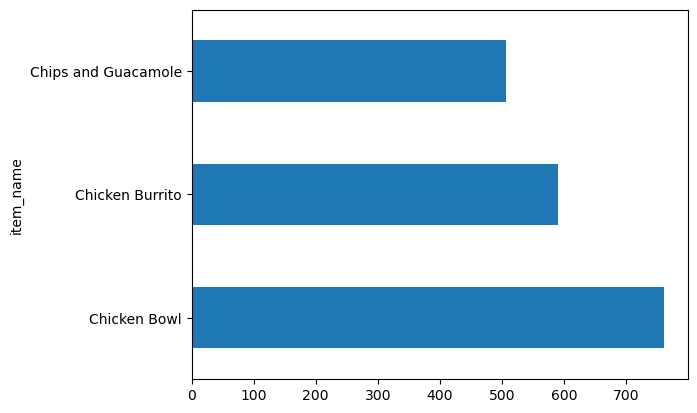

In [296]:
df.groupby('item_name').sum().quantity.nlargest(3).plot.barh(); #nifty

#### 4. Which item has produced the most revenue?

In [302]:
df.groupby('item_name').item_price.sum().nlargest(5).reset_index()

#luckily item_price is a float from the change we did earlier

,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Steak Burrito,3851.43
3,Steak Bowl,2260.19
4,Chips and Guacamole,2201.04


#### 5. Join the `employees` and `titles` DataFrames together.

In [303]:
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [304]:
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [306]:
df_emps = pd.merge(employees, titles, how='inner', on='emp_no') #no need for left/right on because they have the same name for emp_no
df_emps

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


#### 6. For each title, find the hire date of the employee that was hired most recently with that title.

In [309]:
df_emps.groupby('title').hire_date.max().reset_index() #max = most recent
                                                        #for each title

,title,hire_date
0,Assistant Engineer,1999-12-24
1,Engineer,2000-01-28
2,Manager,1992-02-05
3,Senior Engineer,2000-01-01
4,Senior Staff,2000-01-13
5,Staff,2000-01-12
6,Technique Leader,1999-12-31


### 7. Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL code to pull the necessary data and python/pandas code to perform the manipulations.)

In [312]:
df_emps.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01


In [316]:
url = get_db_url(env.user, env.password, env.host, 'employees')

In [318]:
pd.read_sql('show tables', url)

,Tables_in_employees
0,departments
1,dept_emp
2,dept_manager
3,employees
4,salaries
5,titles


In [327]:
query = '''
    select *
    from dept_emp
        join departments
            using (dept_no)
'''

In [328]:
df_depts = pd.read_sql(query, url)
df_depts.head()

,dept_no,emp_no,from_date,to_date,dept_name
0,d009,10011,1990-01-22,1996-11-09,Customer Service
1,d009,10038,1989-09-20,9999-01-01,Customer Service
2,d009,10049,1992-05-04,9999-01-01,Customer Service
3,d009,10060,1992-11-11,9999-01-01,Customer Service
4,d009,10088,1992-03-21,9999-01-01,Customer Service


In [329]:
df_all = pd.merge(df_emps, df_depts, how='inner', on='emp_no')
df_all.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date_x,to_date_x,dept_no,from_date_y,to_date_y,dept_name
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,d005,1986-06-26,9999-01-01,Development
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01,d007,1996-08-03,9999-01-01,Sales
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01,d004,1995-12-03,9999-01-01,Production
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01,d004,1986-12-01,9999-01-01,Production
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01,d004,1986-12-01,9999-01-01,Production


In [330]:
pd.crosstab(df_all.title, df_all.dept_name)

dept_name,Customer Service,Development,Finance,Human Resources,Marketing,Production,Quality Management,Research,Sales
title,,,,,,,,,
Assistant Engineer,298,7769,0,0,0,6445,1831,378,0
Engineer,2362,58135,0,0,0,49649,13852,2986,0
Manager,4,2,2,2,2,4,4,2,2
Senior Engineer,2027,49326,0,0,0,42205,11864,2570,0
Senior Staff,13925,1247,12139,12274,13940,1270,0,11637,36191
Staff,16150,1424,13929,14342,16196,1478,0,13495,41808
Technique Leader,309,7683,0,0,0,6557,1795,393,0
